# **Import all the needed library**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

# **Import the data from csv file**

In [ ]:
#Read csv file
book_data_cleaned = pd.read_csv("book_data_cleaned.csv")
book_data_cleaned.info()
book_data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129462 entries, 0 to 129461
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               129462 non-null  object 
 1   title              129462 non-null  object 
 2   author             129462 non-null  object 
 3   stars              129462 non-null  float64
 4   price              129462 non-null  float64
 5   isKindleUnlimited  129462 non-null  bool   
 6   category_id        129462 non-null  int64  
 7   isBestSeller       129462 non-null  bool   
 8   isEditorsPick      129462 non-null  bool   
 9   isGoodReadsChoice  129462 non-null  bool   
 10  category_name      129462 non-null  object 
dtypes: bool(4), float64(2), int64(1), object(4)
memory usage: 7.4+ MB


,asin,title,author,stars,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,4.8,9.99,False,6,True,False,False,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,4.4,16.99,False,6,False,False,False,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,4.8,16.99,False,6,False,True,False,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,4.2,9.95,True,6,False,True,False,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,4.7,13.99,False,6,False,False,False,Parenting & Relationships


# **Univariate Statistics**
We will start our EDA by explore single variable

## **I. Univariate statistics for numeric variables**
We will check the summary information for numeric variables, the plot box plot, histogram and violin plot for each variable.

In [ ]:
#Check the summary description of numeric variates
book_data_cleaned[["stars", "price"]].describe()

,stars,price
count,129462.000000,129462.000000
mean,4.397281,15.267361
std,0.752242,22.514649
min,0.000000,0.000000
25%,4.400000,4.990000
50%,4.500000,9.990000
75%,4.700000,14.990000
max,5.000000,682.000000


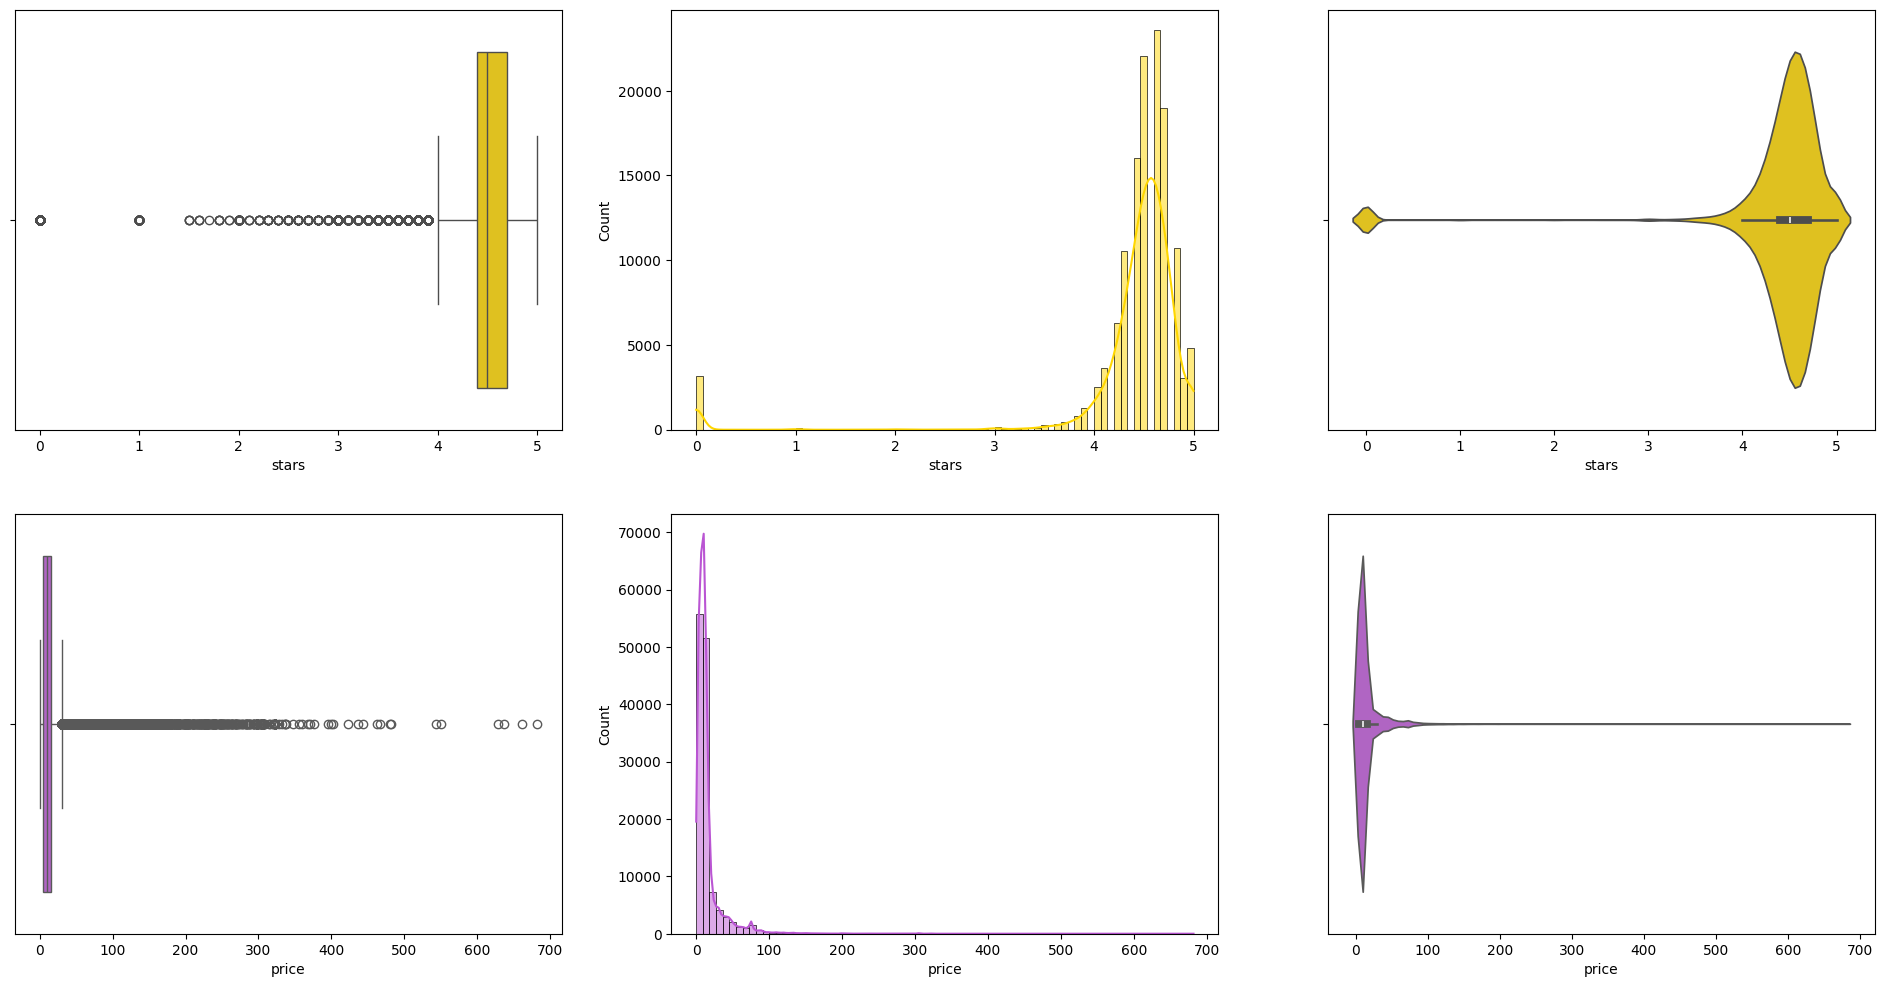

In [ ]:
#Plot box plot, histogram and violin plot for numeric variables
numeric_data = ["stars", "price"]
color = ['gold','mediumorchid']
f, axes = plt.subplots(2, 3, figsize=(24, 12))

count = 0
for var in numeric_data:
    sb.boxplot(data = book_data_cleaned[var], orient = "h", ax = axes[count,0] ,color = color[count]);
    sb.histplot(data = book_data_cleaned[var], ax = axes[count,1], color = color[count], kde=True, bins = 75);
    sb.violinplot(data = book_data_cleaned[var], orient = "h", ax = axes[count,2], color = color[count]);
    count += 1

### **Visualization of Stars and Price Distribution**

`Star` (Top row)
1. **Box Plot**: Shows the distribution of "stars", with most values clustered between 4 and 5 stars, and a few outliers below 4 stars.
2. **Histogram**: Illustrates the frequency of "stars", indicating that the majority are between 4 and 5.
3. **Violin Plot**: Combines features of a box plot and density plot, highlighting a dense concentration between 4 and 5 stars.

`Price` (Bottom row)
1. **Box Plot**: Displays the "price" distribution, with most values concentrated at lower prices, some outliers reaching up to 682.
2. **Histogram**: Presents the frequency distribution of "price", emphasizing that the majority are at lower price ranges.
3. **Violin Plot**: Combines box and density plotting, showcasing a dense distribution at lower prices.

---

## **II. Univariate statistics for categorical variable**
Next, we will explore categorical variables. We will first count the value of book in each **genre** and plot all the values in a categorical plot.

Number of category : 31

category_name
Mystery, Thriller & Suspense    6245
Engineering & Transportation    6138
Science & Math                  5939
Parenting & Relationships       5886
Foreign Language                5719
Teen & Young Adult              5713
Travel                          5513
LGBTQ+ eBooks                   5493
Crafts, Hobbies & Home          5488
Computers & Technology          5486
Biographies & Memoirs           5401
Cookbooks, Food & Wine          5325
Law                             5021
Education & Teaching            4981
Religion & Spirituality         4959
Arts & Photo graphy             4913
Politics & Social Sciences      4205
Literature & Fiction            4136
Humor & Entertainment           4070
Science Fiction & Fantasy       3981
Self-Help                       3488
Reference                       3380
Sports & Outdoors               3199
Medical                         2581
Business & Money                2575
Children's eBooks               2427

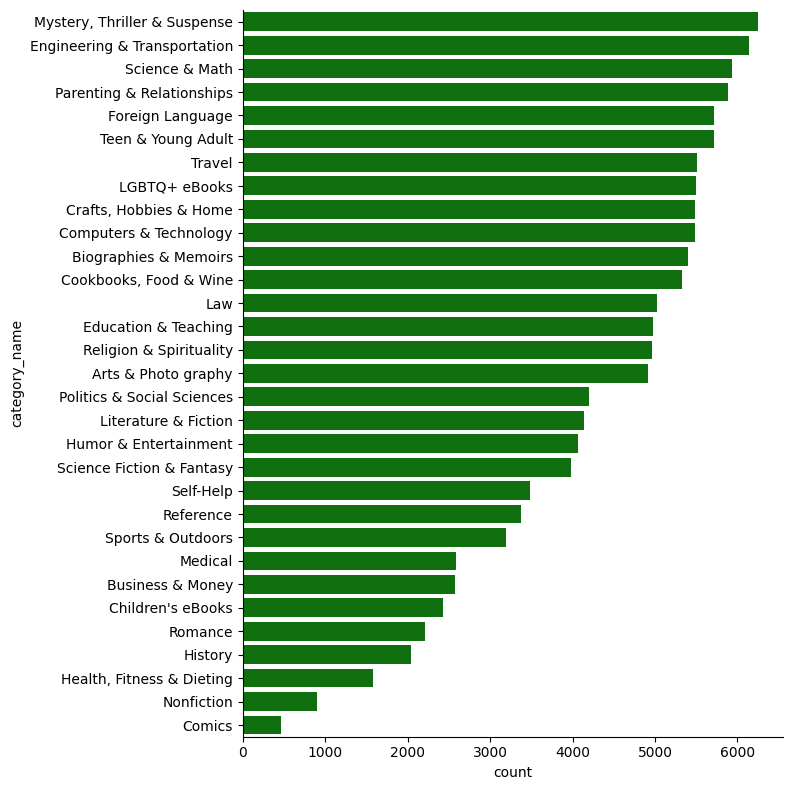

In [ ]:
#Plot categorical plot for categorical variable
print("Number of category :", len(book_data_cleaned["category_name"].unique()))
print()

print(book_data_cleaned["category_name"].value_counts())
sb.catplot(y = "category_name", data = book_data_cleaned, kind = "count",
           order = book_data_cleaned["category_name"].value_counts().index, height = 8, color = "green");

- **Top Categories**: Mystery, Thriller & Suspense (6245) and Engineering & Transportation (6138) dominate, reflecting high demand.
- **Middle-Tier**: LGBTQ+ eBooks (5493) and Crafts, Hobbies & Home (5488) highlight a variety of interests.
- **Lower-Tier**: Nonfiction (896) and Comics (471) show niche or limited content.
- **Observation**: Strong focus on entertainment and technical categories; potential growth in underrepresented areas.

Then, we will examine 3 variables, **"isBestSeller"**, **"isEditorsPick"** and **"isGoodReadsChoice"**.

isBestSeller
False    127321
True       2141
Name: count, dtype: int64 

isEditorsPick
False    124054
True       5408
Name: count, dtype: int64 

isGoodReadsChoice
False    128134
True       1328
Name: count, dtype: int64 



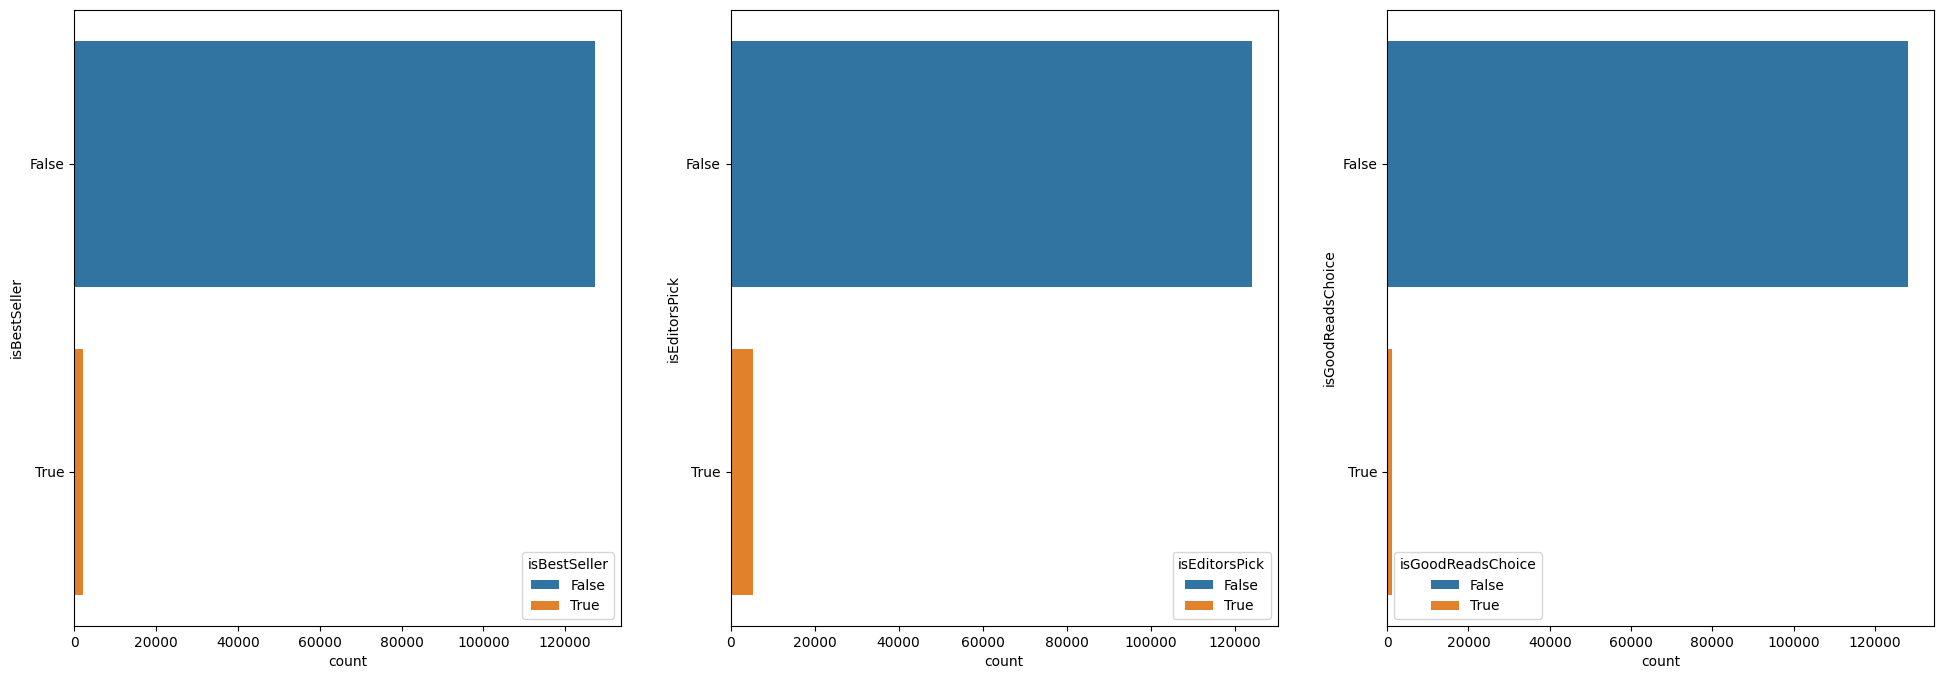

In [ ]:
#Plot categorical plot for "isBestSeller", "isEditorsPick", "isGoodReadsChoice".
choice_value = ["isBestSeller", "isEditorsPick", "isGoodReadsChoice"]
f, axes = plt.subplots(1, 3, figsize=(24, 8))

for var in choice_value:
  print(book_data_cleaned[var].value_counts(), "\n")

count = 0
for var in choice_value:
  sb.countplot(y = var, data = book_data_cleaned, ax = axes[count], palette = 'tab10', hue = var);
  count += 1

## **III. Univariate statistics for "author" variable**
For author variable, we will first count the number of unique author in the dataset. After that we will explore top authors with most book written in the dataset and plot top 20 authors of the list.

- **BestSellers**: Very few books (2,141) are bestsellers, showing exclusivity.
- **Editors' Picks**: A larger but still small group (5,408), indicating notable recognition.
- **Goodreads Choices**: The rarest category (1,328), emphasizing its prestige.
- **Observation**: Most books don't belong to these "prestige" labels, highlighting their rarity.

Number of unique authors:  72096


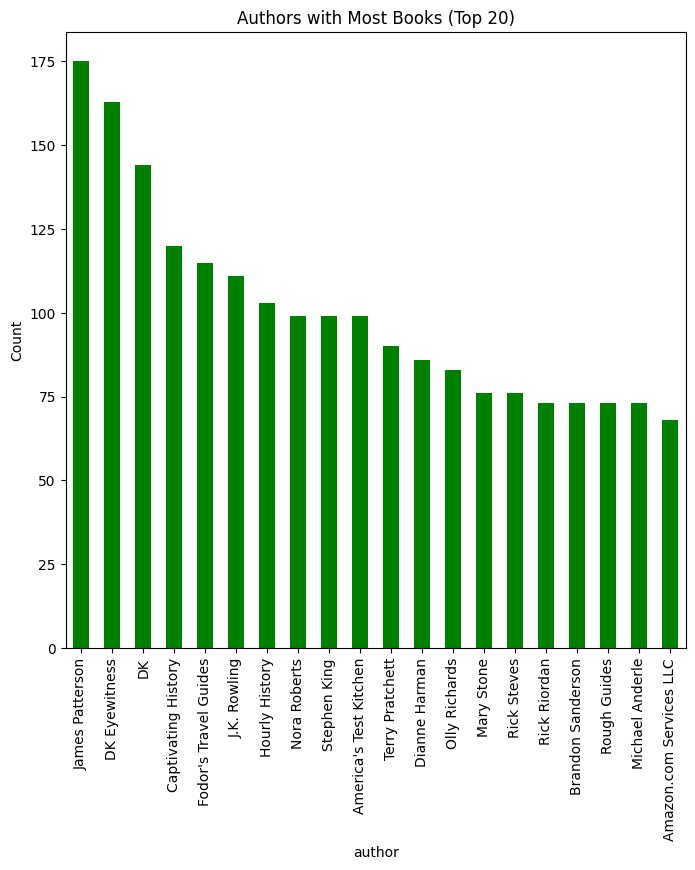

In [ ]:
#Plot top 20 authors with most books written
unique_author = book_data_cleaned['author'].nunique()
print('Number of unique authors: ', unique_author)

plt.figure(figsize=(8,8))
book_data_cleaned.groupby('author')['title'].count().sort_values(ascending=False).head(20).plot(kind='bar',
                                                                                                color= "green")
plt.ylabel('Count')
plt.title('Authors with Most Books (Top 20)')
plt.show()

**1.** Number of unique authors is **72096**, which is a significant amount, implying that there is a wide variety of writers.

\

**2.** For top **20 authors** with most written books:

- **James Patterson**: Leads the count with the highest number of books (~175), highlighting his prolific output.
- **DK Eyewitness and DK**: Both feature prominently with ~150 books each, reflecting the popularity of travel and reference materials.
- **Amazon.com Services LLC**: Ranks lowest among the top 20 authors (~50 books), indicating a narrower range of offerings.\
=>  **Observation**:\
The top authors vary widely in genre, showcasing diversity in literary production and reader interest. James Patterson, DK, and J.K. Rowling are standout names.

###**Conclusion:**
From our univariate exploratory data analysis, we want to focus more on **"isBestSeller"** variable. Therefore, for bivariate and multivariate statistics, we will focus on explore the relationship between **"isBestSeller"** and other variables.

---

# **Bivariate Statistics**
We will continue EDA by examine the relationships between two variables.

## **I. Genres and rating**
We will find the mean rating for each genre and plot the 5 highest rated genres with their star ratings.

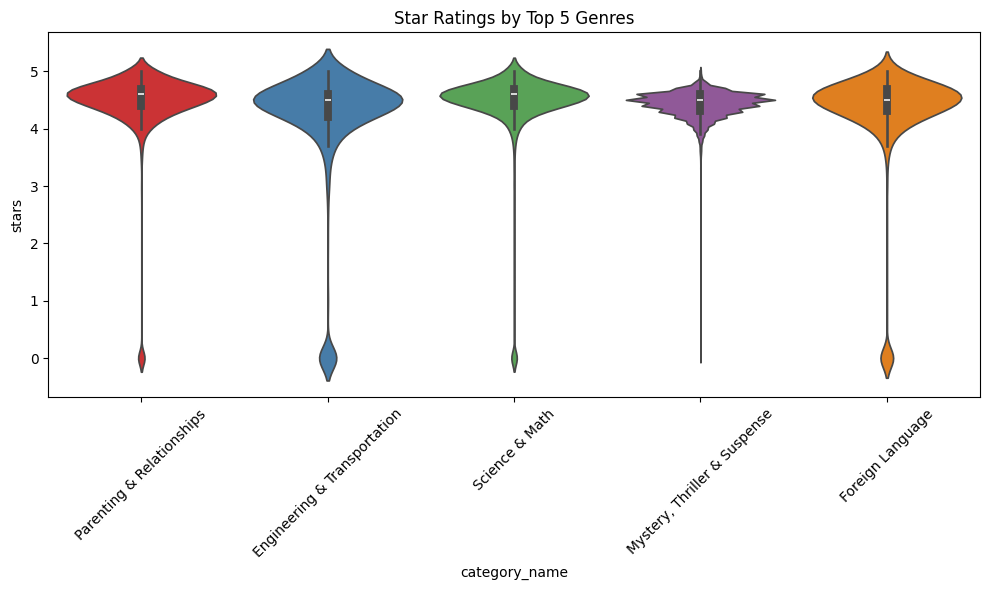

In [ ]:
#Plot 5 highest rated genres and their stars
top_categories = book_data_cleaned['category_name'].value_counts().head(5)
top_genres = top_categories.index.tolist()
filtered_df = book_data_cleaned[book_data_cleaned['category_name'].isin(top_genres)]

plt.figure(figsize=(10, 6))
sb.violinplot(data=filtered_df, x='category_name', y='stars', palette = "Set1", hue = 'category_name')
plt.title("Star Ratings by Top 5 Genres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1. Observation**:
- The top 5 genres are: `Parenting & Relationships`, `Engineering & Transportation`, `Science & Math`, `Mystery, Thriller & Suspense`, `Foreign Language`:
- These genres show distinct star rating distributions, with most ratings concentrated in the range of 4 to 5 stars.
- Star ratings are consistently high, indicating overall customer satisfaction across these popular genres.

**2. Key Insight**:\
The density and median ratings suggest these genres maintain a strong reputation among readers.

## **II. isBestSeller and numeric variables**
We will continue by exploring the connections between **"isBestSeller"** and numeric variables such as **"stars"** and **"rating"**

**Converting Boolean Values and Sorting Data**

To prevent **"isBestSeller"** to be classified as boolean value, we will convert it to **"Yes"** and **"No"**.

The `"isBestSeller"` column is updated as follows:
- **Boolean Conversion**: `True` is mapped to `'Yes'`, and `False` is mapped to `'No'`.
- **Categorical Ordering**: The column is converted to a categorical type with `'No'` preceding `'Yes'`.
- **Data Sorting**: The dataset is sorted by `isBestSeller`, ensuring rows with `'No'` appear before those with `'Yes'`.

In [ ]:
# Convert the boolean values to 'Yes' and 'No'
book_data_cleaned['isBestSeller'] = book_data_cleaned['isBestSeller'].map({True: 'Yes', False: 'No'})
book_data_cleaned['isBestSeller'] = pd.Categorical(book_data_cleaned['isBestSeller'],
                                                   categories=['No','Yes'], ordered=True)
sorted_data = book_data_cleaned.sort_values(by='isBestSeller')

**1. Observation**:
- **Stars Distribution**: Bestseller books generally cluster around higher star ratings, while non-bestsellers show more variability.
- **Price Distribution**: Non-bestsellers span a wider range of prices, while bestsellers are concentrated in specific price points.

**2. Conclusion**:\
The strip plots highlight clear distinctions in both ratings (`stars`) and pricing (`price`) between bestsellers and non-bestsellers, offering insights into patterns of success.

## **III. isBestSeller and genres**

To find the relationships between these two variables, we will draw a heatmap and stacked bar plot.

### **a. Heatmap**
This form of visualisation give us a quick highlight of genres with more best seller and non best seller books.

<ipython-input-12-f9f7576414dc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sb.heatmap(book_data_cleaned.groupby(['isBestSeller', 'category_name']).size().unstack(),


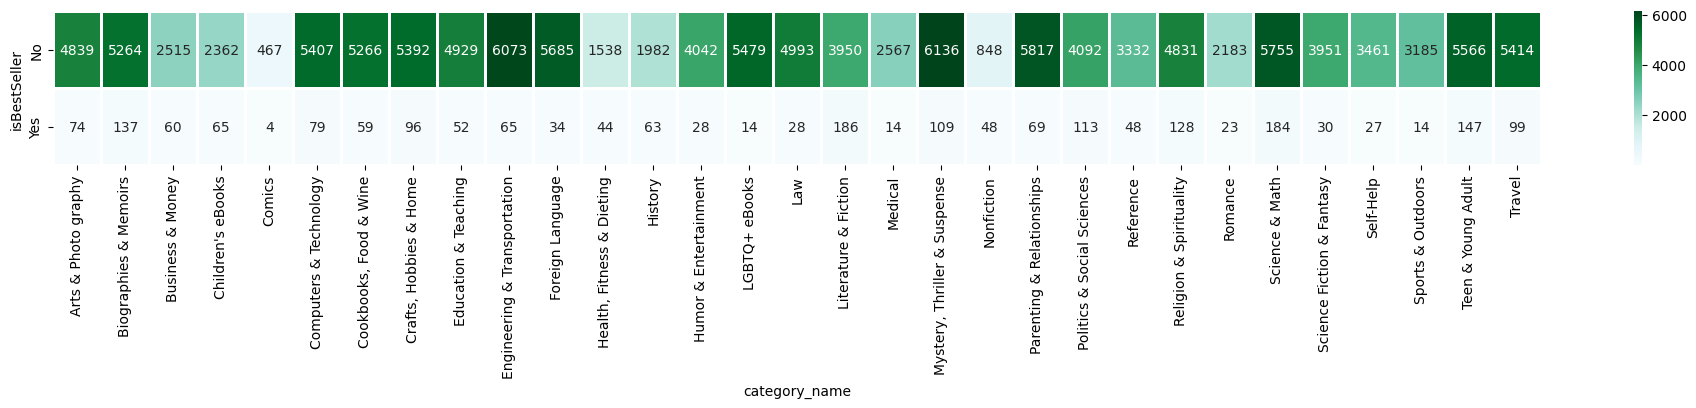

In [ ]:
#Plot heat map between "isBestSeller and genres"
f = plt.figure(figsize=(24, 2))
sb.heatmap(book_data_cleaned.groupby(['isBestSeller', 'category_name']).size().unstack(),
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 10}, cmap = "BuGn");

**1. Observation**:
- **Bestsellers**: Most categories have a significantly higher count of bestseller books compared to non-bestsellers. Engineering & Transportation (6073) and Mystery, Thriller & Suspense (6136) dominate.
- **Non-Bestsellers**: Non-bestsellers are few in most categories, with notable exceptions like Literature & Fiction (186) and Politics & Social Sciences (184).

\

**2. Conclusion:**\
The heatmap highlights clear distinctions in bestseller distribution across categories, with Entertainment and Technical genres leading in popularity.

### **b. Stacked bar plot**
This form of visualisation give us more observation on the **proportion** of best seller and non best seller books in each genres.

<ipython-input-13-58f53d901851>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = book_data_cleaned.groupby(['category_name', 'isBestSeller']).size().unstack(fill_value=0)


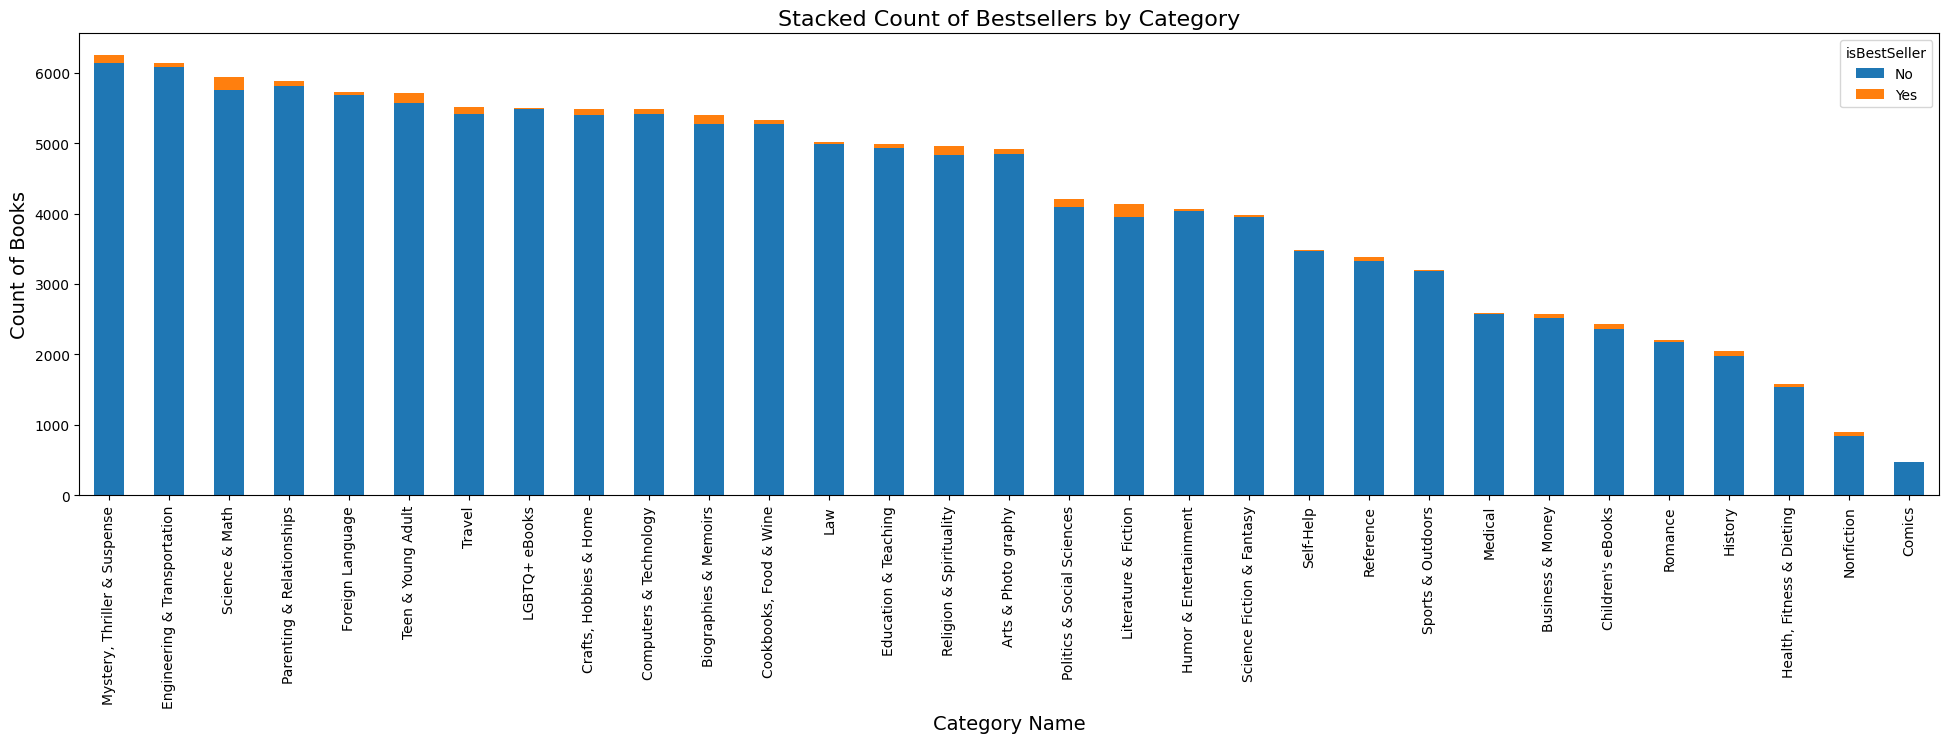

In [ ]:
#Plot stacked bar between "isBestSeller" and genres
pivot = book_data_cleaned.groupby(['category_name', 'isBestSeller']).size().unstack(fill_value=0)
pivot = pivot.loc[book_data_cleaned['category_name'].value_counts().index]
pivot.plot(kind='bar', stacked=True, figsize=(24, 6), color = ['tab:blue', 'tab:orange'])

plt.xlabel('Category Name', fontsize=14)
plt.ylabel('Count of Books', fontsize=14)
plt.xticks(rotation=90)
plt.title('Stacked Count of Bestsellers by Category', fontsize=16)
plt.show()

**1. Observation:**
- **Science & Math** and **Literature & Fiction** are two genres with the highest proportion of best seller books, comparing with the total number of books classified under that genre.
- **Self-Help**, **Comics**, **Medical** and **LGBTQ+ eBooks** have smallest portion of best seller books.
- The genres with more books seem to have larger proportion of best seller books compare to those least popular genres.

**2. Conclusion:**
- Number of books in each genres does not correlated with percentage of best seller books within that genres.
-  A best seller books is determined by more factors than just genres.

## **IV. isBestSeller and authors**
We will find top 20 authors with most written books classified as best seller, then plot a bar chart to visualise.

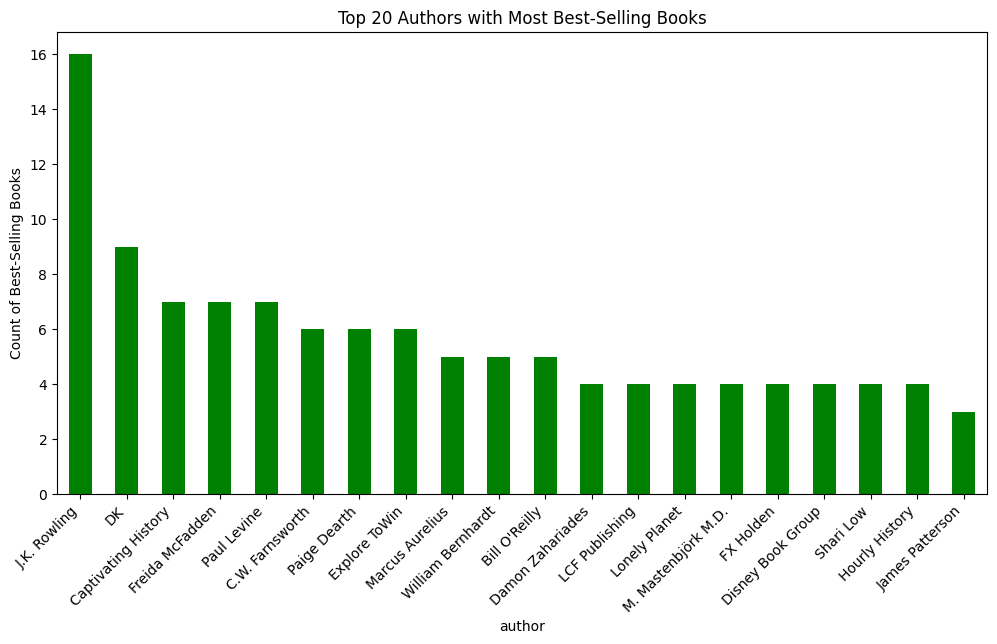

In [ ]:
#Create bestseller books DataFrame and find authors with most bestseller books
book_data_bestseller = book_data_cleaned[book_data_cleaned['isBestSeller'] == 'Yes']
top_authors = book_data_bestseller.groupby('author')['title'].count().sort_values(ascending=False).head(20)

#Plot the bar chart
plt.figure(figsize=(12,6))
top_authors.plot(kind='bar', color = "green")
plt.ylabel('Count of Best-Selling Books')
plt.title('Top 20 Authors with Most Best-Selling Books')
plt.xticks(rotation=45, ha='right')
plt.show()

**1. Observation:**
- **Leading Author**: J.K. Rowling dominates with the highest count (16 best-selling books), demonstrating her unmatched popularity in the literary world.
- **Notable Contributors**: DK (9) and Captivating History (7) stand out with significant contributions, reflecting interest in historical and educational genres.
- **Wide Distribution**: Other authors, including Paul Levine and Freida McFadden, range between 2 and 6 bestsellers, showcasing diversity in genre and appeal.

**2. Conclusion:**\
The chart highlights the strong presence of J.K. Rowling at the top, with a steady decline in bestseller counts among other authors. This distribution suggests certain authors consistently captivate readers and maintain their popularity over time.

---

# **Multivariate Statistics**
Last but not least, we will take a look at relationships of multiple variables

## **I. isBestSeller, star rating and genres**
We will plot a scatter plot and individual box plots for each genres.

### **a. Scatter Plot:**
- `x-axis`: Genres
- `y-axis`: Stars rating
- `Dots`:
> `"No"`: **Blue circle**\
> `"Yes"`: **Orange cross**

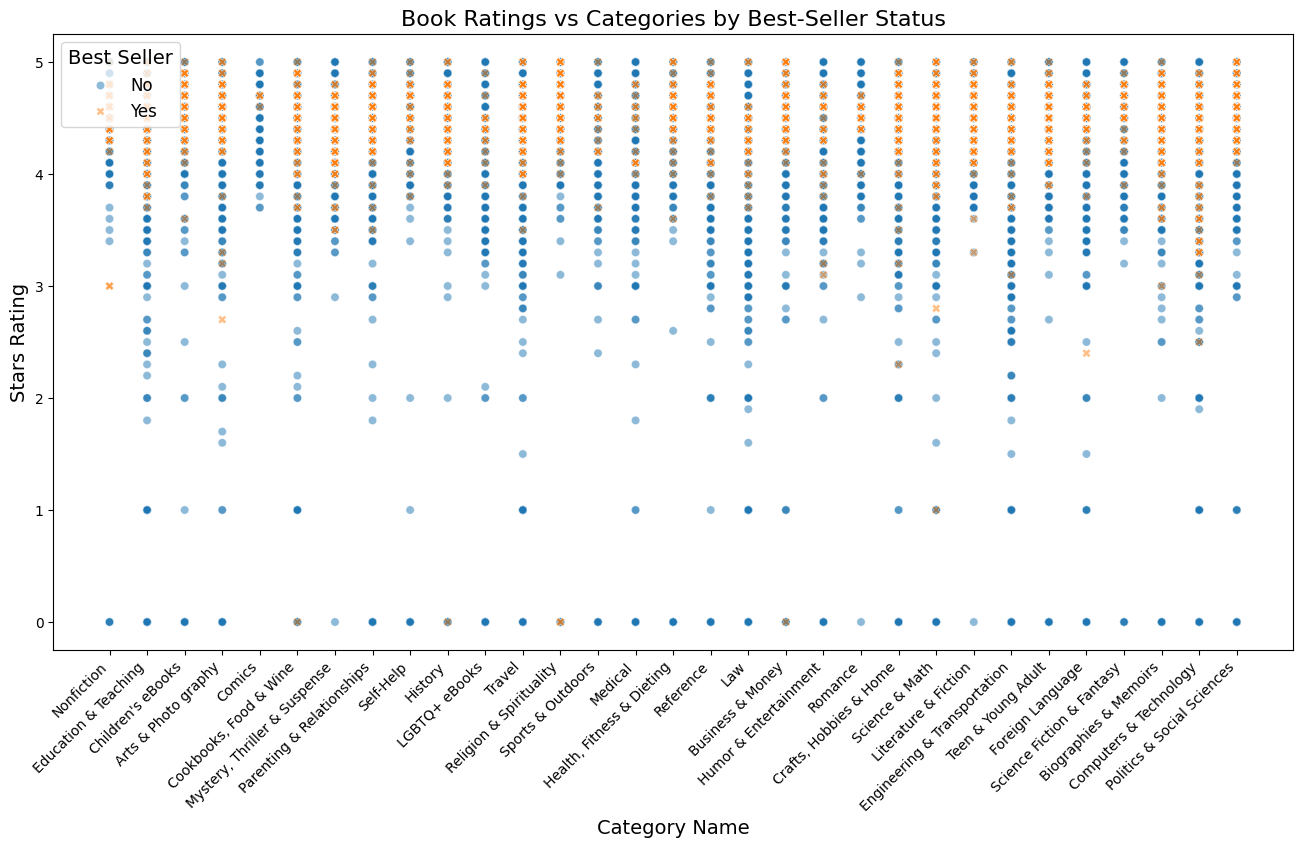

In [ ]:
#Plot scatter plot between stars rating, genres and isBestSeller
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x='category_name', y='stars', hue='isBestSeller', style='isBestSeller',
               data=sorted_data, sizes=(0.1), alpha = 0.5)

plt.xlabel('Category Name', fontsize=14)
plt.ylabel('Stars Rating', fontsize=14)
plt.title('Book Ratings vs Categories by Best-Seller Status', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Best Seller', loc='upper left', fontsize=12, title_fontsize=14)
plt.show()

1. **Star Ratings Across Categories**:
   - Most categories display star ratings clustered between 4 and 5, with a few exceptions showing variability.
   - Categories like **Mystery, Thriller & Suspense** and **Science Fiction & Fantasy** feature consistently high ratings for both best-sellers and non-best-sellers.

2. **Best-Seller Status Comparison**:
   - Orange crosses (best-sellers) dominate high ratings (4-5 stars) in categories such as **Parenting & Relationships** and **Engineering & Transportation**.
   - Non-best-sellers (blue circles) appear more dispersed across the rating range, suggesting greater variability in quality.

### **b. Box plots**:
We will find the relationships between `isBestSeller` and `stars rating` in each genres separately.

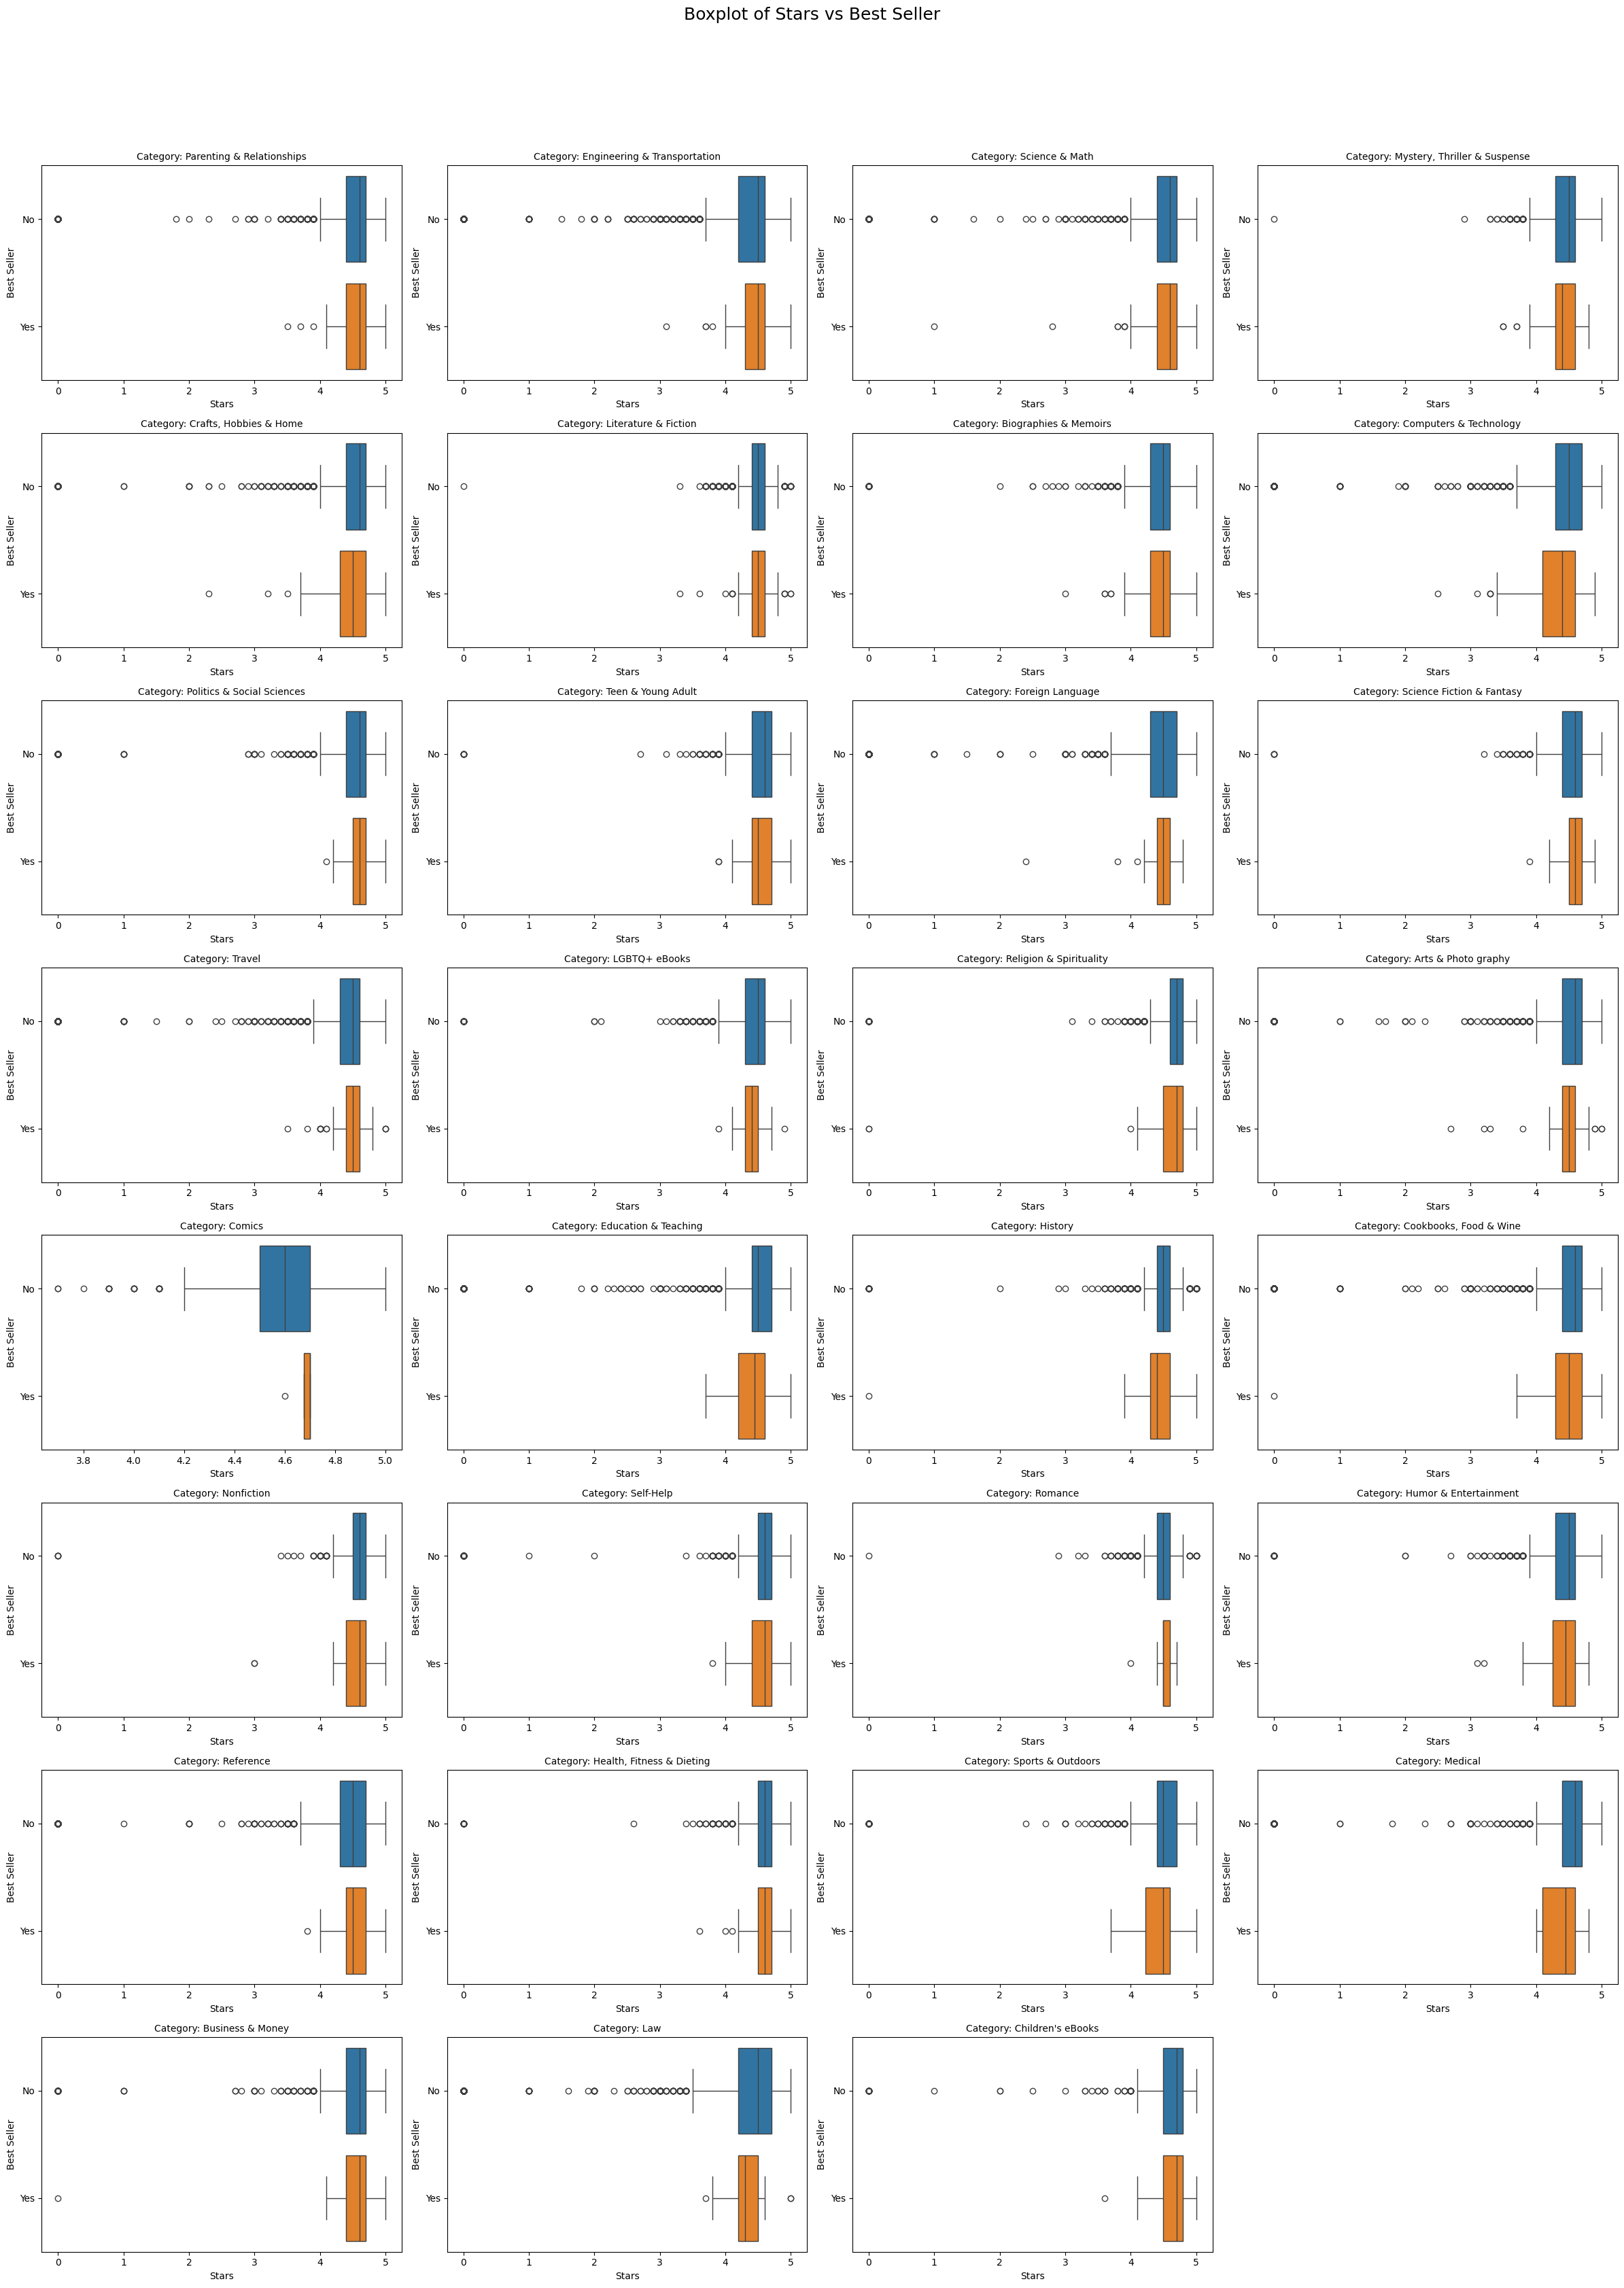

In [ ]:
#Plot box plot between star rating and isBestSeller for each genres
categories = book_data_cleaned['category_name'].unique()

n_cols = 4
n_rows = (len(categories) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 4 * n_rows))
axes = axes.flatten()

for idx, cat in enumerate(categories):
    subset = book_data_cleaned[book_data_cleaned['category_name'] == cat]

    sb.boxplot(x='stars', y='isBestSeller', data=subset, hue='isBestSeller',
               palette='tab10', ax=axes[idx], legend=False);

    axes[idx].set_title(f'Category: {cat}', fontsize=10);
    axes[idx].set_xlabel('Stars');
    axes[idx].set_ylabel('Best Seller');

for ax in axes[len(categories):]:
    ax.axis('off')

plt.suptitle('Boxplot of Stars vs Best Seller', fontsize=18, y=1.05);
plt.tight_layout();
plt.show();

**1. Observation:**
- **Category Comparisons**:
   - Across all categories, best sellers (orange) tend to have higher star ratings compared to non-best sellers (blue).
   - Variability in star ratings for non-best sellers is more pronounced in categories like **History & Archaeology** and **Politics**, reflecting a wider range of reader experiences.

- **Consistency in Best Sellers**:
   - Best sellers exhibit tighter distributions around higher star ratings (4-5 stars) in most categories
- **Outlier Observations**:
  - In certain categories, such as **Science & Nature**, non-best sellers include outliers with very high ratings

**2. Conclusion:**\
The boxplots reveal a strong correlation between best seller status and higher star ratings, emphasizing the impact of reader satisfaction on achieving bestseller recognition. Categories like **Science & Nature** and **History & Archaeology** showcase interesting overlaps in star ratings between the two groups, hinting at exceptions in the general trend.

## **II. isBestSeller, star rating and genres**
We will plot a scatter plot and individual box plots for each genres, with the same process as above.

### **a. Scatter Plot:**
- `x-axis`: Genres
- `y-axis`: Stars rating
- `Dots`:
> `"No"`: **Blue circle**\
> `"Yes"`: **Orange cross**

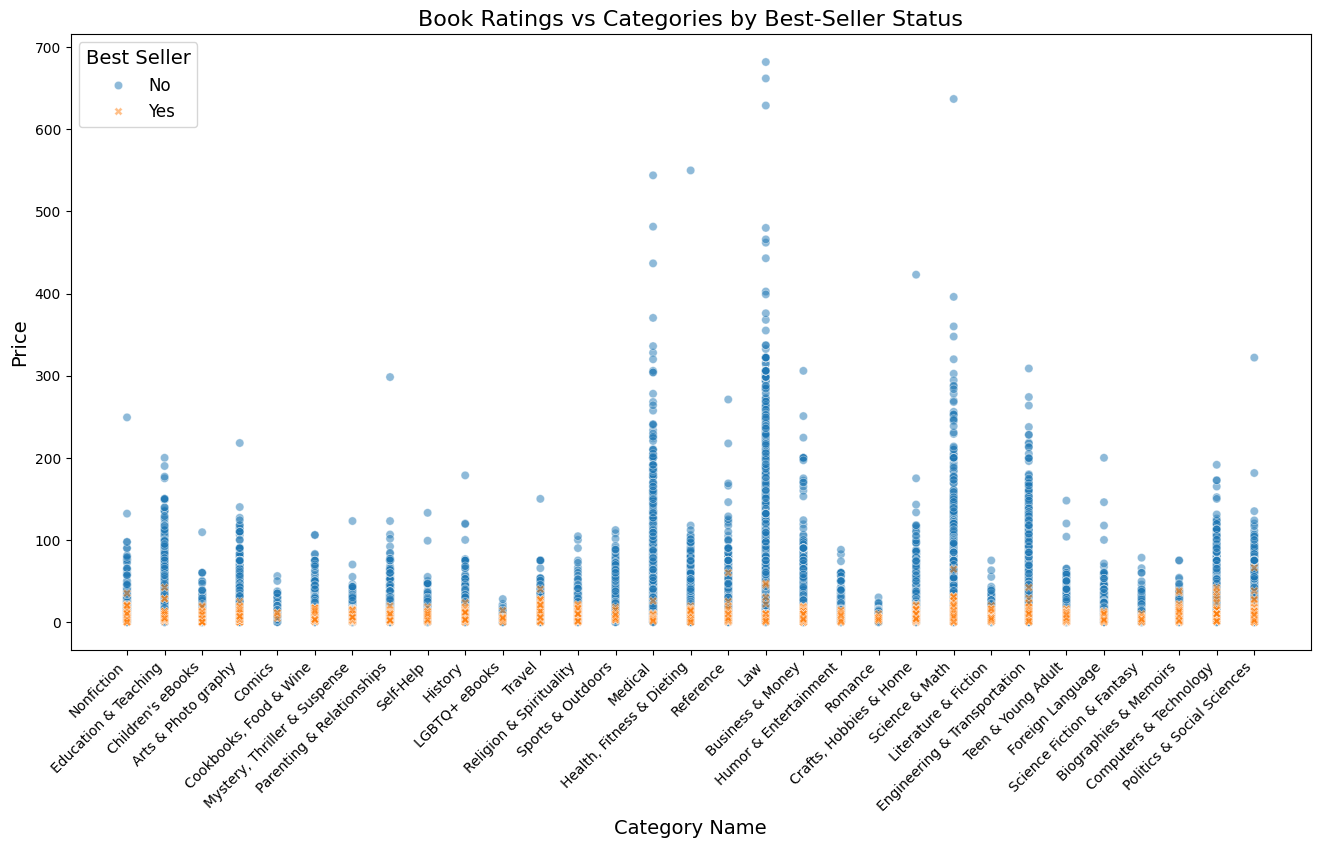

In [ ]:
#Plot scatter plot between prices, genres and isBestSeller
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x='category_name', y='price', hue='isBestSeller', style='isBestSeller',
               data=sorted_data, sizes=(0.1), alpha = 0.5)

plt.xlabel('Category Name', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Book Ratings vs Categories by Best-Seller Status', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Best Seller', loc='upper left', fontsize=12, title_fontsize=14)
plt.show()

**1. Observation:**

- **Best-Sellers**:
   - Prices for best-sellers are more concentrated in mid-to-high ranges across most categories, with notable clusters under **Mystery, Thriller & Suspense**, **Engineering & Transportation**, and **Science Fiction & Fantasy**.
   - Few best-sellers exceed the 700 mark, indicating a cap in premium pricing.

- **Non-Best-Sellers**:
   - Non-best-sellers show a wider spread in prices, particularly in categories like **Arts & Photography** and **Biographies & Memoirs**, with some reaching over 700.
   - Variability suggests non-bestsellers often explore diverse pricing strategies.

**2. Highlights:**
- **Price Consistency**:\
  Categories like **Parenting & Relationships** and **Self-Help** exhibit close clustering for best-sellers, pointing to standardized pricing.
- **Outliers**:\
  High-priced books, such as certain best-sellers in **Science & Math** and non-bestsellers in **Medical**, appear as outliers in the data.

### **b. Box plots**:
We will find the relationships between `isBestSeller` and `stars rating` in each genres separately.

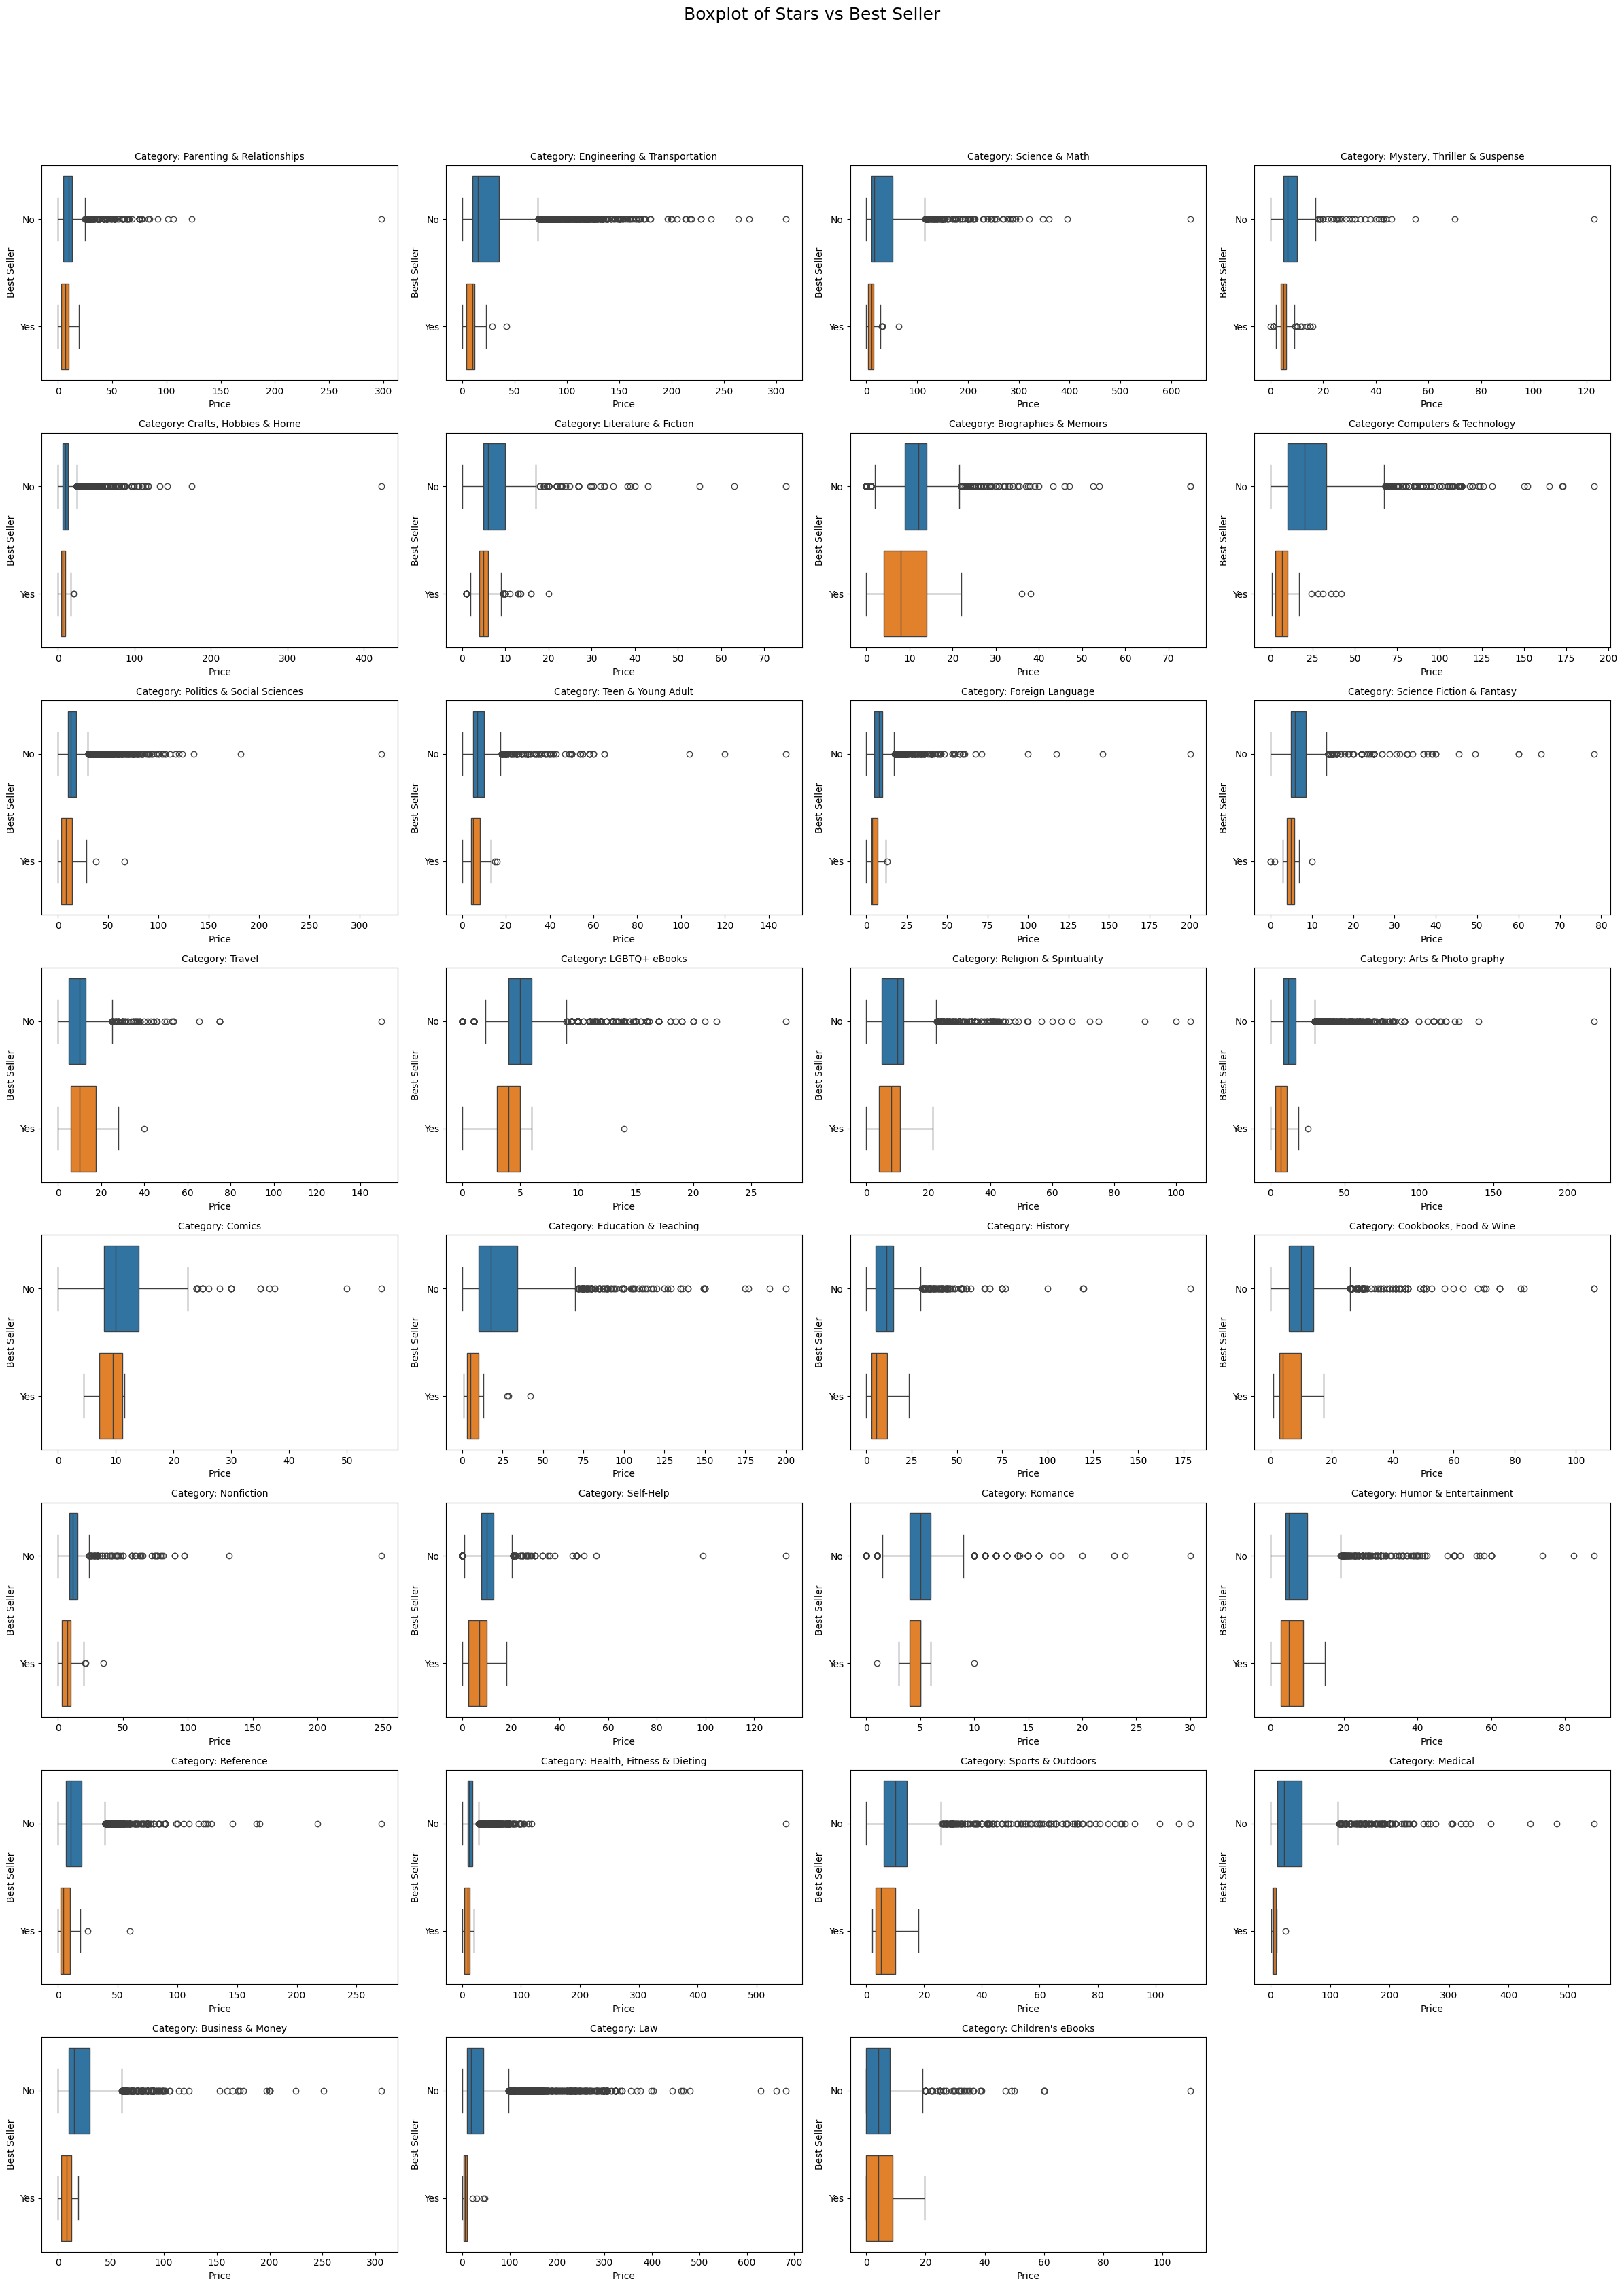

In [ ]:
#Plot box plots between prices and isBestSeller in each genres*
categories = book_data_cleaned['category_name'].unique()

n_cols = 4
n_rows = (len(categories) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 4 * n_rows))
axes = axes.flatten()

for idx, cat in enumerate(categories):
    subset = book_data_cleaned[book_data_cleaned['category_name'] == cat]

    sb.boxplot(x='price', y='isBestSeller', data=subset, hue='isBestSeller',
               palette='tab10', ax=axes[idx], legend=False);

    axes[idx].set_title(f'Category: {cat}', fontsize=10);
    axes[idx].set_xlabel('Price');
    axes[idx].set_ylabel('Best Seller');

for ax in axes[len(categories):]:
    ax.axis('off')

plt.suptitle('Boxplot of Stars vs Best Seller', fontsize=18, y=1.05);
plt.tight_layout();
plt.show();

**1. Best Sellers:**
- **Star Ratings**:
   - Most best sellers show star ratings clustered around **4 to 5 stars**, emphasizing consistent high-quality reader reviews.
   - Variability across categories is minimal, signaling strong overall satisfaction.

- **Categories**:
   - Categories like **Science Fiction & Fantasy**, **Mystery, Thriller & Suspense**, and **Biographies & Memoirs** exhibit tight, high-rating distributions for best sellers.

**2. Non-Best Sellers:**
- **Star Ratings**:
   - Ratings for non-best sellers display greater spread, including **lower scores** below 3 stars.
   - Some categories like **Arts & Photography** and **Politics & Social Sciences** feature broader variability, showing mixed audience reception.

- **Outliers**:
   - In certain categories, outliers exist for non-best sellers with high star ratings rivaling those of best sellers.